In [2]:
import os
import json
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pylab as plt
import requests
from bs4 import BeautifulSoup
import sqlite3
import re
from selenium import webdriver
from selenium.webdriver.common.by import By

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

In [3]:
#clean the url code for it search
url = "https://www.vivino.com/catena-zapata-malbec-argentino/w/1869"
r = requests.get(url,
headers= {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0"
})

res = re.search(r"^.*window\.__PRELOADED_STATE__\.winePageInformation\s*=\s*(.*});", r.text, re.MULTILINE)
data = json.loads(res.group(1))

data

{'wine': {'id': 1869,
  'name': 'Malbec Argentino',
  'seo_name': 'malbec-argentino',
  'type_id': 1,
  'vintage_type': 0,
  'is_natural': False,
  'region': {'id': 454,
   'name': 'Mendoza',
   'name_en': '',
   'seo_name': 'mendoza',
   'country': {'code': 'ar',
    'name': 'Argentina',
    'native_name': 'Argentina',
    'seo_name': 'argentina',
    'currency': {'code': 'ARS',
     'name': 'Argentinean Peso',
     'prefix': '$',
     'suffix': None},
    'regions_count': 41,
    'users_count': 694556,
    'wines_count': 38637,
    'wineries_count': 5506,
    'most_used_grapes': [{'id': 9,
      'name': 'Malbec',
      'seo_name': 'malbec',
      'has_detailed_info': True,
      'wines_count': 219735,
      'parent_grape_id': None},
     {'id': 2,
      'name': 'Cabernet Sauvignon',
      'seo_name': 'cabernet-sauvignon',
      'has_detailed_info': True,
      'wines_count': 801751,
      'parent_grape_id': None},
     {'id': 5,
      'name': 'Chardonnay',
      'seo_name': 'chardonn

In [4]:
recommended_vintages = data["recommended_vintages"]
recommended_df = pd.DataFrame(recommended_vintages)

recommended_df


,vintage,type,highlight_icon,price
0,"{'id': 167040378, 'seo_name': 'catena-zapata-m...",price_discounted,https://images.vivino.com/highlights/icon/pric...,"{'id': 35525782, 'type': 'xdo', 'amount': 114...."
1,"{'id': 162906889, 'seo_name': 'catena-zapata-m...",best_user_rated,https://images.vivino.com/highlights/icon/best...,"{'id': 36328636, 'type': 'vc', 'amount': 72.99..."
2,"{'id': 150304508, 'seo_name': 'catena-zapata-m...",top_listed,https://images.vivino.com/highlights/icon/top_...,None
3,"{'id': 1367737, 'seo_name': 'catena-zapata-mal...",wsa_winning,https://images.vivino.com/highlights/icon/wsa_...,None
4,"{'id': 14629297, 'seo_name': 'catena-zapata-ma...",most_user_rated,https://images.vivino.com/highlights/icon/most...,None
5,"{'id': 156097620, 'seo_name': 'catena-zapata-m...",top_ranked,https://images.vivino.com/highlights/icon/top_...,None


In [5]:
all_vintages = data["wine"]["vintages"]
all_vintages_df = pd.DataFrame(all_vintages)

all_vintages_df

,id,seo_name,name,statistics,year,grapes,has_valid_ratings
0,176756216,catena-zapata-malbec-argentino-2024,Catena Zapata Malbec Argentino 2024,"{'status': 'BelowThreshold', 'ratings_count': ...",2024,None,False
1,173651219,catena-zapata-malbec-argentino-2023,Catena Zapata Malbec Argentino 2023,"{'status': 'BelowThreshold', 'ratings_count': ...",2023,None,False
2,170617957,catena-zapata-malbec-argentino-2022,Catena Zapata Malbec Argentino 2022,"{'status': 'Normal', 'ratings_count': 340, 'ra...",2022,None,True
3,167040378,catena-zapata-malbec-argentino-2021,Catena Zapata Malbec Argentino 2021,"{'status': 'Normal', 'ratings_count': 2461, 'r...",2021,None,True
4,162906889,catena-zapata-malbec-argentino-2020,Catena Zapata Malbec Argentino 2020,"{'status': 'Normal', 'ratings_count': 3189, 'r...",2020,None,True
...,...,...,...,...,...,...,...
77,142295273,catena-zapata-malbec-argentino-1795,Catena Zapata Malbec Argentino 1795,"{'status': 'BelowThreshold', 'ratings_count': ...",1795,None,False
78,153087639,catena-zapata-malbec-argentino-1792,Catena Zapata Malbec Argentino 1792,"{'status': 'BelowThreshold', 'ratings_count': ...",1792,None,False
79,8117325,catena-zapata-malbec-argentino-1791,Catena Zapata Malbec Argentino 1791,"{'status': 'BelowThreshold', 'ratings_count': ...",1791,None,False
80,145391591,catena-zapata-malbec-argentino-1790,Catena Zapata Malbec Argentino 1790,"{'status': 'BelowThreshold', 'ratings_count': ...",1790,None,False


In [6]:
all_vintages_df_True = all_vintages_df[all_vintages_df["has_valid_ratings"] == True]
# all_vintages_df_True["statistics"][2]
def extract_object_data(Object_data):
    """Extracts key-value pairs from an object and returns a Series."""
    if isinstance(Object_data, dict):
        return pd.Series(Object_data)
    else:
        return pd.Series()  # Handle other data types if needed

# Apply the function to the 'object_column' and create a new DataFrame
new_columns = all_vintages_df_True['statistics'].apply(extract_object_data)

# Concatenate the original DataFrame with the new columns
all_vintages_df_True = pd.concat([all_vintages_df_True, new_columns], axis=1)

# Print the modified DataFrame
# (all_vintages_df_True)

selected_columns = ['id', 'name', 'year', 'ratings_average', 'reviews_count', 'has_valid_ratings']
df1 = all_vintages_df_True[selected_columns]

(df1)

,id,name,year,ratings_average,reviews_count,has_valid_ratings
2,170617957,Catena Zapata Malbec Argentino 2022,2022,4.6,78,True
3,167040378,Catena Zapata Malbec Argentino 2021,2021,4.6,679,True
4,162906889,Catena Zapata Malbec Argentino 2020,2020,4.6,922,True
5,159537944,Catena Zapata Malbec Argentino 2019,2019,4.6,870,True
6,156097620,Catena Zapata Malbec Argentino 2018,2018,4.7,1422,True
7,150304508,Catena Zapata Malbec Argentino 2017,2017,4.7,5316,True
8,114439954,Catena Zapata Malbec Argentino 2016,2016,4.5,162,True
9,14629297,Catena Zapata Malbec Argentino 2015,2015,4.5,1981,True
10,4148366,Catena Zapata Malbec Argentino 2014,2014,3.8,663,True
11,2059174,Catena Zapata Malbec Argentino 2013,2013,3.8,1477,True


In [7]:
recommended_df['id'] = recommended_df['vintage'].apply(lambda x: x['id'] if 'id' in x else None)
recommended_df['name'] = recommended_df['vintage'].apply(lambda x: x['name'] if 'name' in x else None)
recommended_df['amount'] = recommended_df['price'].apply(lambda x: x['amount'] if isinstance(x, dict) and 'amount' in x else None)
# recommended_df

selected_columns = ['id', 'name', 'type', 'amount']
df2 = recommended_df[selected_columns]
df2

,id,name,type,amount
0,167040378,Catena Zapata Malbec Argentino 2021,price_discounted,114.99
1,162906889,Catena Zapata Malbec Argentino 2020,best_user_rated,72.99
2,150304508,Catena Zapata Malbec Argentino 2017,top_listed,NaN
3,1367737,Catena Zapata Malbec Argentino 2009,wsa_winning,NaN
4,14629297,Catena Zapata Malbec Argentino 2015,most_user_rated,NaN
5,156097620,Catena Zapata Malbec Argentino 2018,top_ranked,NaN


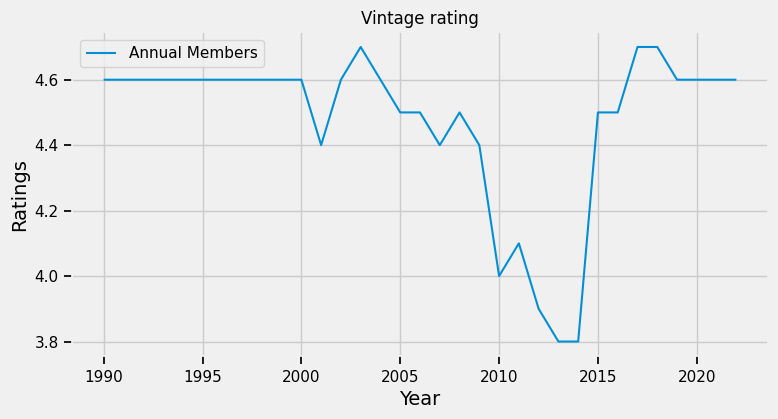

In [8]:
merge_df = pd.merge(df1, df2, on="id", how="outer")
# merged_df
selected_columns = ['id', 'name_x', 'year', 'ratings_average', 'reviews_count', 'has_valid_ratings', 'type', 'amount']
final_winebottlevintage_df = merge_df [selected_columns]
final_winebottlevintage_df

filtered_winebottle = final_winebottlevintage_df[
    (final_winebottlevintage_df['year'] >= 1900) &
    (final_winebottlevintage_df['ratings_average'] > 3) &
    (final_winebottlevintage_df['reviews_count'] > 1)
].sort_values(by='year', ascending=False)

# Display the filtered DataFrame
# filtered_winebottle
plt.figure(figsize=(8, 4))
sns.lineplot(x=filtered_winebottle['year'], y=filtered_winebottle['ratings_average'],label='Annual Members')

plt.xlabel('Year', fontsize=14)
plt.ylabel('Ratings', fontsize=14)
plt.title('Vintage rating')

plt.legend()

plt.show()

In [9]:
filtered_winebottle

,id,name_x,year,ratings_average,reviews_count,has_valid_ratings,type,amount
25,170617957,Catena Zapata Malbec Argentino 2022,2022,4.6,78,True,NaN,NaN
24,167040378,Catena Zapata Malbec Argentino 2021,2021,4.6,679,True,price_discounted,114.99
23,162906889,Catena Zapata Malbec Argentino 2020,2020,4.6,922,True,best_user_rated,72.99
22,159537944,Catena Zapata Malbec Argentino 2019,2019,4.6,870,True,NaN,NaN
21,156097620,Catena Zapata Malbec Argentino 2018,2018,4.7,1422,True,top_ranked,NaN
20,150304508,Catena Zapata Malbec Argentino 2017,2017,4.7,5316,True,top_listed,NaN
19,114439954,Catena Zapata Malbec Argentino 2016,2016,4.5,162,True,NaN,NaN
18,14629297,Catena Zapata Malbec Argentino 2015,2015,4.5,1981,True,most_user_rated,NaN
16,4148366,Catena Zapata Malbec Argentino 2014,2014,3.8,663,True,NaN,NaN
13,2059174,Catena Zapata Malbec Argentino 2013,2013,3.8,1477,True,NaN,NaN


In [10]:
# Set max column width to display full URL
pd.set_option('display.max_colwidth', None)

# Load your data
df3 = pd.read_csv('wine_filtered.csv')

# Remove everything after "?" in the URL column
df3['URL'] = df3['URL'].str.split('?').str[0]

# Display the modified DataFrame
df3['URL'] 

0         https://www.vivino.com/hundred-acre-wraith-cabernet-sauvignon-napa-valley/w/5978015
1     https://www.vivino.com/domaine-de-la-romanee-conti-grands-echezeaux-grand-cru/w/1286354
2          https://www.vivino.com/bryant-family-cabernet-sauvignon-proprietor-grown/w/1645873
3                        https://www.vivino.com/del-dotto-the-david-howell-mountain/w/1611180
4                           https://www.vivino.com/screaming-eagle-cabernet-sauvignon/w/82025
5         https://www.vivino.com/hundred-acre-wraith-cabernet-sauvignon-napa-valley/w/5978015
6     https://www.vivino.com/domaine-de-la-romanee-conti-grands-echezeaux-grand-cru/w/1286354
7          https://www.vivino.com/bryant-family-cabernet-sauvignon-proprietor-grown/w/1645873
8                        https://www.vivino.com/del-dotto-the-david-howell-mountain/w/1611180
9                           https://www.vivino.com/screaming-eagle-cabernet-sauvignon/w/82025
10        https://www.vivino.com/hundred-acre-wraith-caberne

In [11]:
conn = sqlite3.connect('red_wines_final 1.db')
c = conn.cursor()
wine_df = pd.read_sql_query("SELECT * FROM red_wines", conn)
wine_df = wine_df.sort_values(by='Price', ascending = False)
wine_df_filtered=wine_df.drop_duplicates(subset=['Producer', 'WineType'], keep = 'first')
wine_df_filtered['URL']

1585                                          https://www.vivino.com/bacigalupi-zinfandel/w/2259925?year=2015&price_id=30889819
313              https://www.vivino.com/domaine-de-la-romanee-conti-romanee-conti-grand-cru/w/83912?year=2010&price_id=30505150
366                                                 https://www.vivino.com/le-pin-pomerol/w/1197490?year=1995&price_id=36990149
126                                         https://www.vivino.com/chateau-petrus-pomerol/w/1166837?year=2020&price_id=36990161
1676     https://www.vivino.com/domaine-arnoux-lachaux-vosne-romanee-1er-cru-aux-reignots/w/1495399?year=2019&price_id=35876925
                                                                  ...                                                          
22214                         https://www.vivino.com/woodbridge-by-robert-mondavi-pinot-noir/w/5811?year=2017&price_id=30865020
21809                            https://www.vivino.com/delheim-cabernet-sauvignon-shiraz/w/2218656?year

In [14]:
import requests
import re
import json
import pandas as pd

# Assuming wine_df_filtered is your DataFrame that contains the URLs
df3 = wine_df_filtered[['URL']]  

# Clean the URLs by removing query parameters (if any)
df3['URL'] = df3['URL'].str.split('?').str[0]

# Initialize lists to store the extracted data and failed URLs
all_recommended_vintages = []
all_vintages_data = []
failed_urls = []  # List to store failed URLs

# Loop through each URL in the filtered DataFrame
for index, row in df3.iterrows():
    url = row['URL']  # Access the URL directly
    print(f"Processing URL: {url}")  # Log the current URL being processed
    
    try:
        r = requests.get(url, headers={
            "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0"
        })

        # Check if the request was successful
        if r.status_code == 200:
            # Search for the JavaScript data in the page source
            res = re.search(r"window\.__PRELOADED_STATE__\.winePageInformation\s*=\s*(.*});", r.text, re.MULTILINE)
            
            if res:
                data = json.loads(res.group(1))
                
                # Extract recommended vintages
                recommended_vintages = data.get("recommended_vintages", [])
                if recommended_vintages:
                    recommended_df = pd.DataFrame(recommended_vintages)
                    recommended_df['source_url'] = url  # Add the URL for reference
                    all_recommended_vintages.append(recommended_df)

                # Extract all vintages
                all_vintages = data.get("wine", {}).get("vintages", [])
                if all_vintages:
                    all_vintages_df = pd.DataFrame(all_vintages)
                    all_vintages_df['source_url'] = url  # Add the URL for reference
                    all_vintages_data.append(all_vintages_df)

            else:
                print(f"No data found for URL: {url}")
                failed_urls.append(url)  # Append failed URL
        else:
            print(f"Failed to retrieve data for URL: {url}, Status code: {r.status_code}")
            failed_urls.append(url)  # Append failed URL
    
    except Exception as e:
        print(f"An error occurred for URL: {url} - {str(e)}")
        failed_urls.append(url)  # Append failed URL

# Concatenate all the recommended vintages and all vintages data into DataFrames
if all_recommended_vintages:
    final_recommended_vintages_df = pd.concat(all_recommended_vintages, ignore_index=True)
else:
    final_recommended_vintages_df = pd.DataFrame()  # Empty DataFrame if no data

if all_vintages_data:
    final_all_vintages_df = pd.concat(all_vintages_data, ignore_index=True)
else:
    final_all_vintages_df = pd.DataFrame()  # Empty DataFrame if no data

# Display the final extracted data
print("Extracted Recommended Vintages Data:")
print(final_recommended_vintages_df)

print("\nExtracted All Vintages Data:")
print(final_all_vintages_df)

# Display the failed URLs
if failed_urls:
    print("\nFailed URLs:")
    print(failed_urls)
else:
    print("\nNo failed URLs.")


Processing URL: https://www.vivino.com/bacigalupi-zinfandel/w/2259925
Processing URL: https://www.vivino.com/domaine-de-la-romanee-conti-romanee-conti-grand-cru/w/83912
Processing URL: https://www.vivino.com/le-pin-pomerol/w/1197490
Processing URL: https://www.vivino.com/chateau-petrus-pomerol/w/1166837
Processing URL: https://www.vivino.com/domaine-arnoux-lachaux-vosne-romanee-1er-cru-aux-reignots/w/1495399
Processing URL: https://www.vivino.com/tenuta-san-guido-sassicaia/w/5078
Processing URL: https://www.vivino.com/chateau-mouton-rothschild-pauillac-premier-grand-cru-classe/w/1684223
Processing URL: https://www.vivino.com/truchot-martin-vieilles-vignes-charmes-chambertin-grand-cru/w/3120598
Processing URL: https://www.vivino.com/domaine-de-la-romanee-conti-grands-echezeaux-grand-cru/w/1286354
Processing URL: https://www.vivino.com/screaming-eagle-cabernet-sauvignon/w/82025
Processing URL: https://www.vivino.com/domaine-de-la-romanee-conti-la-tache-grand-cru/w/83911
Processing URL: h

In [15]:

final_recommended_vintages_df

,vintage,type,highlight_icon,price,source_url
0,"{'id': 147519855, 'seo_name': 'bacigalupi-zinfandel-2016', 'name': 'Bacigalupi Zinfandel 2016', 'statistics': {'status': 'Normal', 'ratings_count': 35, 'ratings_average': 4.5, 'labels_count': 140, 'reviews_count': 20}, 'year': 2016, 'grapes': None, 'has_valid_ratings': True}",best_user_rated,https://images.vivino.com/highlights/icon/best_user_rated.svg,None,https://www.vivino.com/bacigalupi-zinfandel/w/2259925
1,"{'id': 154248950, 'seo_name': 'bacigalupi-zinfandel-2015', 'name': 'Bacigalupi Zinfandel 2015', 'statistics': {'status': 'Normal', 'ratings_count': 27, 'ratings_average': 4.4, 'labels_count': 97, 'reviews_count': 14}, 'year': 2015, 'grapes': None, 'has_valid_ratings': True}",most_user_rated,https://images.vivino.com/highlights/icon/most_user_rated.svg,"{'id': 30889819, 'type': 'ppc', 'amount': 54513.9, 'currency': {'code': 'CAD', 'name': 'Canadian Dollars', 'prefix': '$', 'suffix': None}, 'discounted_from': None}",https://www.vivino.com/bacigalupi-zinfandel/w/2259925
2,"{'id': 167792546, 'seo_name': 'bacigalupi-zinfandel-2019', 'name': 'Bacigalupi Zinfandel 2019', 'statistics': {'status': 'BelowThreshold', 'ratings_count': 11, 'ratings_average': 0, 'labels_count': 75, 'reviews_count': 5}, 'year': 2019, 'grapes': None, 'has_valid_ratings': False}",top_ranked,https://images.vivino.com/highlights/icon/top_ranked.svg,None,https://www.vivino.com/bacigalupi-zinfandel/w/2259925
3,"{'id': 1309310, 'seo_name': 'domaine-de-la-romanee-conti-romanee-conti-grand-cru-2000', 'name': 'Domaine de La Romanée-Conti Romanée-Conti Grand Cru 2000', 'statistics': {'status': 'Normal', 'ratings_count': 262, 'ratings_average': 4.7, 'labels_count': 2820, 'reviews_count': 64}, 'year': 2000, 'grapes': None, 'has_valid_ratings': True}",wsa_winning,https://images.vivino.com/highlights/icon/wsa_winning.svg,None,https://www.vivino.com/domaine-de-la-romanee-conti-romanee-conti-grand-cru/w/83912
4,"{'id': 159459464, 'seo_name': 'domaine-de-la-romanee-conti-romanee-conti-grand-cru-2019', 'name': 'Domaine de La Romanée-Conti Romanée-Conti Grand Cru 2019', 'statistics': {'status': 'Normal', 'ratings_count': 70, 'ratings_average': 4.9, 'labels_count': 936, 'reviews_count': 18}, 'year': 2019, 'grapes': None, 'has_valid_ratings': True}",best_user_rated,https://images.vivino.com/highlights/icon/best_user_rated.svg,None,https://www.vivino.com/domaine-de-la-romanee-conti-romanee-conti-grand-cru/w/83912
...,...,...,...,...,...
38367,"{'id': 1359262, 'seo_name': 'santa-carolina-cabernet-sauvignon-varietal-2011', 'name': 'Santa Carolina Cabernet Sauvignon (Varietal) 2011', 'statistics': {'status': 'Normal', 'ratings_count': 745, 'ratings_average': 3, 'labels_count': 4233, 'reviews_count': 145}, 'year': 2011, 'grapes': None, 'has_valid_ratings': True}",most_user_rated,https://images.vivino.com/highlights/icon/most_user_rated.svg,None,https://www.vivino.com/santa-carolina-cabernet-sauvignon-varietal/w/1152089
38368,"{'id': 147835980, 'seo_name': 'felix-solis-los-molinos-valdepenas-crianza-2016', 'name': 'Félix Solís Los Molinos Valdepeñas Crianza 2016', 'statistics': {'status': 'Normal', 'ratings_count': 249, 'ratings_average': 3.7, 'labels_count': 3528, 'reviews_count': 100}, 'year': 2016, 'grapes': None, 'has_valid_ratings': True}",best_user_rated,https://images.vivino.com/highlights/icon/best_user_rated.svg,None,https://www.vivino.com/felix-solis-los-molinos-valdepenas-crianza/w/1734960
38369,"{'id': 101140534, 'seo_name': 'felix-solis-los-molinos-valdepenas-crianza-2015', 'name': 'Félix Solís Los Molinos Valdepeñas Crianza 2015', 'statistics': {'status': 'Normal', 'ratings_count': 245, 'ratings_average': 3.5, 'labels_count': 4823, 'reviews_count': 87}, 'year': 2015, 'grapes': None, 'has_valid_ratings': True}",most_user_rated,https://images.vivino.com/highlights/icon/most_user_rated.svg,None,https://www.vivino.com/felix-solis-los-molinos-valdepenas-crianza/w/1734960
38370,"{'id': 1236043, 'seo_name': 'crane-lake-pi

In [16]:
final_all_vintages_df

,id,seo_name,name,statistics,year,grapes,has_valid_ratings,source_url
0,176916427,bacigalupi-zinfandel-2022,Bacigalupi Zinfandel 2022,"{'status': 'BelowThreshold', 'ratings_count': 1, 'ratings_average': 0, 'labels_count': 1, 'reviews_count': 0}",2022,None,False,https://www.vivino.com/bacigalupi-zinfandel/w/2259925
1,173856042,bacigalupi-zinfandel-2021,Bacigalupi Zinfandel 2021,"{'status': 'BelowThreshold', 'ratings_count': 5, 'ratings_average': 0, 'labels_count': 36, 'reviews_count': 3}",2021,None,False,https://www.vivino.com/bacigalupi-zinfandel/w/2259925
2,171559100,bacigalupi-zinfandel-2020,Bacigalupi Zinfandel 2020,"{'status': 'BelowThreshold', 'ratings_count': 0, 'ratings_average': 0, 'labels_count': 0, 'reviews_count': 0}",2020,None,False,https://www.vivino.com/bacigalupi-zinfandel/w/2259925
3,167792546,bacigalupi-zinfandel-2019,Bacigalupi Zinfandel 2019,"{'status': 'BelowThreshold', 'ratings_count': 11, 'ratings_average': 0, 'labels_count': 75, 'reviews_count': 5}",2019,None,False,https://www.vivino.com/bacigalupi-zinfandel/w/2259925
4,164394048,bacigalupi-zinfandel-2018,Bacigalupi Zinfandel 2018,"{'status': 'BelowThreshold', 'ratings_count': 21, 'ratings_average': 0, 'labels_count': 135, 'reviews_count': 8}",2018,None,False,https://www.vivino.com/bacigalupi-zinfandel/w/2259925
...,...,...,...,...,...,...,...,...
418532,68836723,crane-lake-pinot-noir-1993,Crane Lake Pinot Noir 1993,"{'status': 'BelowThreshold', 'ratings_count': 0, 'ratings_average': 0, 'labels_count': 0, 'reviews_count': 0}",1993,None,False,https://www.vivino.com/crane-lake-pinot-noir/w/1132649
418533,163293956,crane-lake-pinot-noir-1991,Crane Lake Pinot Noir 1991,"{'status': 'BelowThreshold', 'ratings_count': 0, 'ratings_average': 0, 'labels_count': 0, 'reviews_count': 0}",1991,None,False,https://www.vivino.com/crane-lake-pinot-noir/w/1132649
418534,38590533,crane-lake-pinot-noir-1978,Crane Lake Pinot Noir 1978,"{'status': 'BelowThreshold', 'ratings_count': 0, 'ratings_average': 0, 'labels_count': 0, 'reviews_count': 0}",1978,None,False,https://www.vivino.com/crane-lake-pinot-noir/w/1132649
418535,24872659,crane-lake-pinot-noir-1976,Crane Lake Pinot Noir 1976,"{'status': 'BelowThreshold', 'ratings_count': 0, 'ratings_average': 0, 'labels_count': 0, 'reviews_count': 0}",1976,None,False,https://www.vivino.com/crane-lake-pinot-noir/w/1132649


In [17]:
final_all_vintages_df_True = final_all_vintages_df[final_all_vintages_df["has_valid_ratings"] == True]
# all_vintages_df_True["statistics"][2]
def extract_object_data(Object_data):
    """Extracts key-value pairs from an object and returns a Series."""
    if isinstance(Object_data, dict):
        return pd.Series(Object_data)
    else:
        return pd.Series()  # Handle other data types if needed

# Apply the function to the 'object_column' and create a new DataFrame
new_columns = final_all_vintages_df_True['statistics'].apply(extract_object_data)

# Concatenate the original DataFrame with the new columns
final_all_vintages_df_True = pd.concat([final_all_vintages_df_True, new_columns], axis=1)

# Print the modified DataFrame
# (final_all_vintages_df_True)

selected_columns = ['id', 'name', 'year', 'ratings_average', 'reviews_count', 'has_valid_ratings']
df4 = final_all_vintages_df_True[selected_columns]

df4

,id,name,year,ratings_average,reviews_count,has_valid_ratings
6,147519855,Bacigalupi Zinfandel 2016,2016,4.5,20,True
7,154248950,Bacigalupi Zinfandel 2015,2015,4.4,14,True
22,4971178,Bacigalupi Zinfandel,0,4.4,3,True
26,162909346,Domaine de La Romanée-Conti Romanée-Conti Grand Cru 2020,2020,4.7,14,True
27,159459464,Domaine de La Romanée-Conti Romanée-Conti Grand Cru 2019,2019,4.9,18,True
...,...,...,...,...,...,...
418517,2175427,Crane Lake Pinot Noir 2012,2012,3.0,86,True
418518,1377237,Crane Lake Pinot Noir 2011,2011,2.9,27,True
418519,1236043,Crane Lake Pinot Noir 2010,2010,3.6,6,True
418520,1171623,Crane Lake Pinot Noir 2009,2009,3.3,13,True


In [18]:
final_recommended_vintages_df['id'] = final_recommended_vintages_df['vintage'].apply(lambda x: x['id'] if 'id' in x else None)
final_recommended_vintages_df['name'] = final_recommended_vintages_df['vintage'].apply(lambda x: x['name'] if 'name' in x else None)
final_recommended_vintages_df['amount'] = final_recommended_vintages_df['price'].apply(lambda x: x['amount'] if isinstance(x, dict) and 'amount' in x else None)
# final_recommended_df

selected_columns = ['id', 'name', 'type', 'amount']
df5 = final_recommended_vintages_df[selected_columns]
df5

,id,name,type,amount
0,147519855,Bacigalupi Zinfandel 2016,best_user_rated,NaN
1,154248950,Bacigalupi Zinfandel 2015,most_user_rated,54513.9
2,167792546,Bacigalupi Zinfandel 2019,top_ranked,NaN
3,1309310,Domaine de La Romanée-Conti Romanée-Conti Grand Cru 2000,wsa_winning,NaN
4,159459464,Domaine de La Romanée-Conti Romanée-Conti Grand Cru 2019,best_user_rated,NaN
...,...,...,...,...
38367,1359262,Santa Carolina Cabernet Sauvignon (Varietal) 2011,most_user_rated,NaN
38368,147835980,Félix Solís Los Molinos Valdepeñas Crianza 2016,best_user_rated,NaN
38369,101140534,Félix Solís Los Molinos Valdepeñas Crianza 2015,most_user_rated,NaN
38370,1236043,Crane Lake Pinot Noir 2010,best_user_rated,NaN


In [ ]:
final_merge_df = pd.merge(df4, df5, on="id", how="outer")
# merged_df
selected_columns = ['id', 'name_x', 'year', 'ratings_average', 'reviews_count', 'has_valid_ratings', 'type', 'amount']
all_winebottlevintage_df = final_merge_df [selected_columns]
all_winebottlevintage_df

all_filtered_winebottle = all_winebottlevintage_df[
    (all_winebottlevintage_df['year'] >= 1900) &
    (all_winebottlevintage_df['ratings_average'] > 3) &
    (all_winebottlevintage_df['reviews_count'] > 1)
].sort_values(by='name_x', ascending=False)

# Display the all_filtered DataFrame
pd.set_option('display.max_rows', 3000)  # Set to None to show all rows
pd.set_option('display.max_columns', None)
all_filtered_winebottle


,id,name_x,year,ratings_average,reviews_count,has_valid_ratings,type,amount
132244,167844161,Éric Chevalier Émeri 2020,2020.0,3.8,12.0,True,best_user_rated,NaN
118011,160189471,Éric Chevalier Émeri 2018,2018.0,3.5,15.0,True,most_user_rated,NaN
138239,172970038,È Jamu Zimbato Chianti 2021,2021.0,4.0,8.0,True,best_user_rated,NaN
128844,165847548,È Jamu Zimbato Chianti 2019,2019.0,3.9,17.0,True,most_user_rated,NaN
127767,164918292,Áster Crianza 2020,2020.0,4.1,104.0,True,top_ranked,NaN
...,...,...,...,...,...,...,...,...
133613,168770279,100 Nails Ranch Pinot Noir 2020,2020.0,3.8,36.0,True,best_user_rated,NaN
131035,167314372,100 Nails Ranch Pinot Noir 2019,2019.0,3.5,18.0,True,most_user_rated,NaN
132869,168233793,100 Nails Ranch Cabernet Sauvignon 2020,2020.0,3.7,45.0,True,most_user_rated,39.19
129873,166756066,100 Nails Ranch Cabernet Sauvignon 2019,2019.0,3.8,24.0,True,best_user_rated,NaN


In [22]:
all_filtered_winebottle.to_csv(r'C:\Users\masca\Downloads\allfiltered_winebottles.csv', index = True)

In [13]:
AWB = pd.read_csv('allfiltered_winebottles.csv')

# Use regex to remove the year (4-digit number) from the name_x column
AWB['name_x'] = AWB['name_x'].str.replace(r' \d{4}$', '', regex=True)
AWB

,Unnamed: 0,id,name_x,year,ratings_average,reviews_count,has_valid_ratings,type,amount
0,132244,167844161,Éric Chevalier Émeri,2020.0,3.8,12.0,True,best_user_rated,NaN
1,118011,160189471,Éric Chevalier Émeri,2018.0,3.5,15.0,True,most_user_rated,NaN
2,138239,172970038,È Jamu Zimbato Chianti,2021.0,4.0,8.0,True,best_user_rated,NaN
3,128844,165847548,È Jamu Zimbato Chianti,2019.0,3.9,17.0,True,most_user_rated,NaN
4,127767,164918292,Áster Crianza,2020.0,4.1,104.0,True,top_ranked,NaN
...,...,...,...,...,...,...,...,...,...
126580,133613,168770279,100 Nails Ranch Pinot Noir,2020.0,3.8,36.0,True,best_user_rated,NaN
126581,131035,167314372,100 Nails Ranch Pinot Noir,2019.0,3.5,18.0,True,most_user_rated,NaN
126582,132869,168233793,100 Nails Ranch Cabernet Sauvignon,2020.0,3.7,45.0,True,most_user_rated,39.19
126583,129873,166756066,100 Nails Ranch Cabernet Sauvignon,2019.0,3.8,24.0,True,best_user_rated,NaN


In [17]:
import matplotlib.pyplot as plt

# Filter data for years between 2000 and 2024
filtered_AWB = AWB[(AWB['year'] >= 2000) & (AWB['year'] <= 2024)]

# Further filter out rows with review count below 20
filtered_AWB = filtered_AWB[filtered_AWB['reviews_count'] >= 20]

# Initialize the plot
plt.figure(figsize=(12, 8))

# Group by wine name
grouped = filtered_AWB.groupby('name_x')

# Plot each group
for name_x, group in grouped:
    plt.plot(group['year'], group['ratings_average'], marker='o', label=name_x)

# Add labels, legend, and title
plt.xlabel('Year')
plt.ylabel('Ratings Average')
plt.title('Year vs Ratings Average for Different Wine Bottles')
plt.legend(title='Wine Bottle', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()

# Adjust layout to fit legend
plt.tight_layout()
plt.show()


ValueError: Image size of 2033x233451 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1200x800 with 1 Axes>

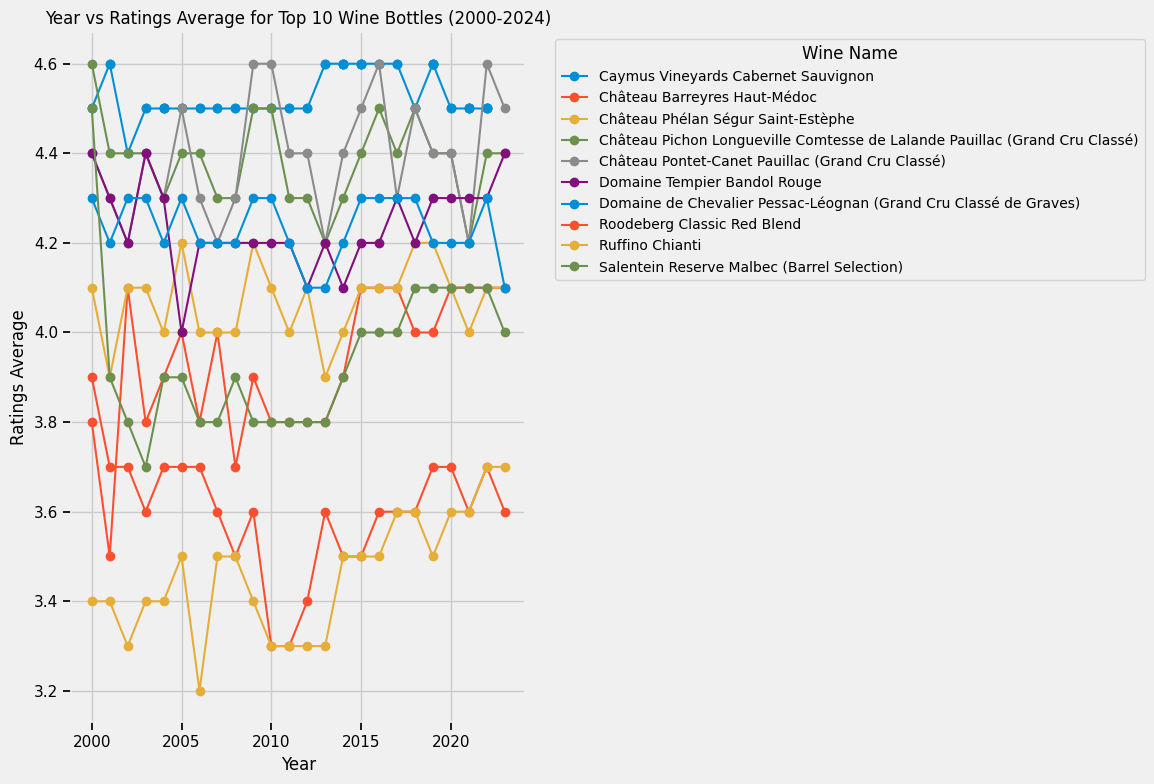

In [18]:
import matplotlib.pyplot as plt

# Filter rows for the year range 2000 to 2024
AWB = AWB[(AWB['year'] >= 2000) & (AWB['year'] <= 2024)]

# Group by 'name_x' and count the number of rows per wine
wine_counts = AWB['name_x'].value_counts()

# Select the top 10 wines with the most data points
top_wines = wine_counts.head(10).index
filtered_AWB = AWB[AWB['name_x'].isin(top_wines)]

# Plot
plt.figure(figsize=(12, 8))

for name_x, group in filtered_AWB.groupby('name_x'):
    plt.plot(
        group['year'], 
        group['ratings_average'], 
        marker='o', 
        label=name_x  # Add the wine name to the legend
    )

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Ratings Average')
plt.title('Year vs Ratings Average for Top 10 Wine Bottles (2000-2024)')
plt.legend(title='Wine Name', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')  # Adjust legend font size
plt.grid(True)
plt.tight_layout()

plt.show()


In [19]:
# Filter rows where 'amount' is not NaN
filtered_AWB = AWB[AWB['amount'].notna()]

# Filter rows for the year range 2000 to 2024
filtered_AWB = filtered_AWB[(filtered_AWB['year'] >= 2000) & (filtered_AWB['year'] <= 2024)]

# Group by 'name_x' and calculate the mean rating per year for each wine
filtered_AWB = (
    filtered_AWB.groupby(['name_x', 'year'])['ratings_average']
    .mean()
    .reset_index()
)

# Plot
plt.figure(figsize=(10, 6))  # Adjusted figure size

for name_x, group in filtered_AWB.groupby('name_x'):
    plt.plot(
        group['year'], 
        group['ratings_average'], 
        marker='o', 
        label=name_x  # Add the wine name to the legend
    )

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Ratings Average')
plt.title('Year vs Ratings Average for Wines with Amount (2000-2024)')
plt.legend(title='Wine Name', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(True)
plt.tight_layout()

plt.show()


ValueError: Image size of 1740x106836 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1000x600 with 1 Axes>

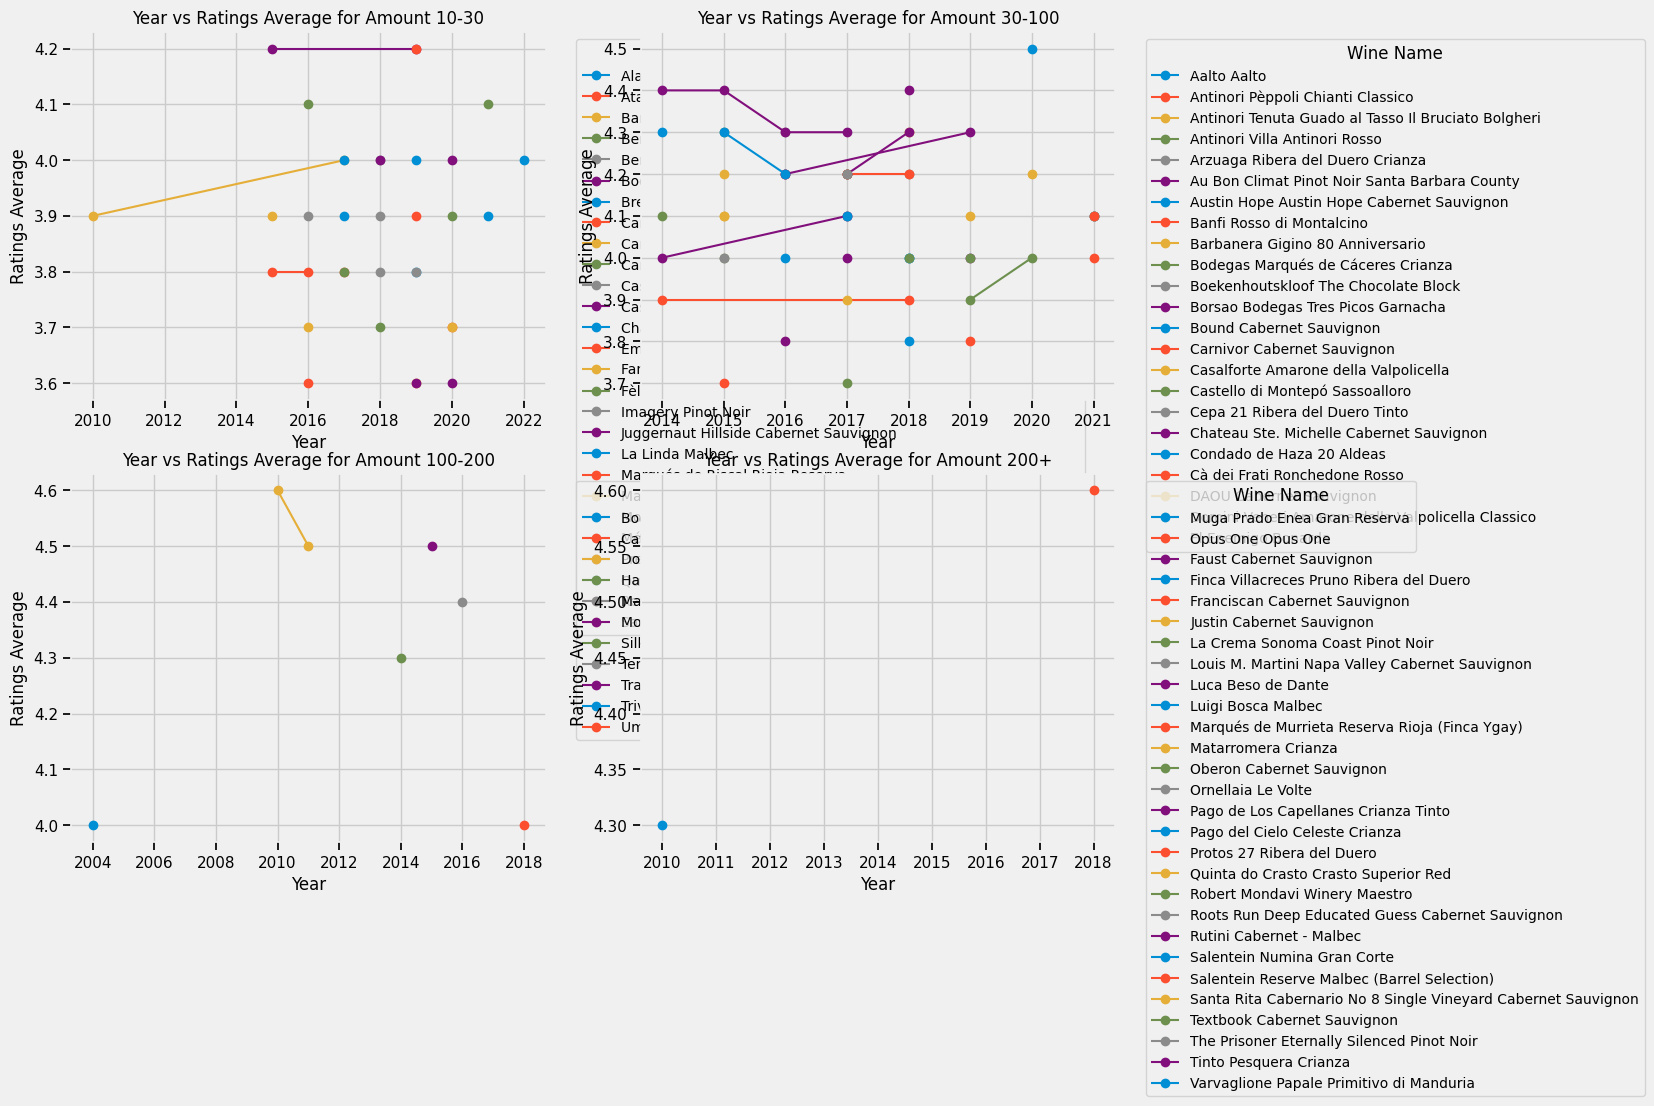

In [31]:
import matplotlib.pyplot as plt

# Handle NaN values in the 'amount' column
AWB['amount'] = pd.to_numeric(AWB['amount'], errors='coerce')  # Ensure 'amount' is numeric
AWB_clean = AWB[AWB['amount'].notna()]  # Drop rows where 'amount' is NaN

# Filter data to only include years from 2000 to 2024
AWB_clean = AWB_clean[(AWB_clean['year'] >= 2000) & (AWB_clean['year'] <= 2024)]

# Filter wines with a minimum number of reviews (e.g., 20 reviews)
AWB_clean = AWB_clean[AWB_clean['reviews_count'] >= 1000]

# Create separate plots based on amount ranges
amount_ranges = [(10, 30), (30, 100), (100, 200), (200, float('inf'))]
range_labels = ['10-30', '30-100', '100-200', '200+']

plt.figure(figsize=(12, 10))

# Loop through each amount range and create a subplot for each range
for i, (min_amount, max_amount) in enumerate(amount_ranges):
    plt.subplot(2, 2, i+1)  # Create a 2x2 grid of subplots
    
    # Filter data by amount range
    filtered_data = AWB_clean[(AWB_clean['amount'] >= min_amount) & (AWB_clean['amount'] < max_amount)]
    
    # Plot year vs ratings_average for the filtered data
    for name_x, group in filtered_data.groupby('name_x'):
        plt.plot(group['year'], group['ratings_average'], marker='o', label=name_x)
    
    # Add labels, title, and legend
    plt.xlabel('Year')
    plt.ylabel('Ratings Average')
    plt.title(f'Year vs Ratings Average for Amount {range_labels[i]}')
    plt.legend(title='Wine Name', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
    plt.grid(True)

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


In [28]:
print(AWB_clean.columns)

Index(['Unnamed: 0', 'id', 'name_x', 'year', 'ratings_average',
       'reviews_count', 'has_valid_ratings', 'type', 'amount'],
      dtype='object')


In [23]:
print(AWB['amount'].isna().sum())  # Check how many NaNs are in 'amount'
print(AWB['amount'].head())        # Preview the first few rows of 'amount'


110218
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: amount, dtype: float64
